In [12]:
import baltic as bt
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

/Users/ifeanyi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Tree height: 9.749077
Tree length: 191.004809
strictly bifurcating tree
annotations present

Numbers of objects in tree: 373 (186 nodes and 187 leaves)



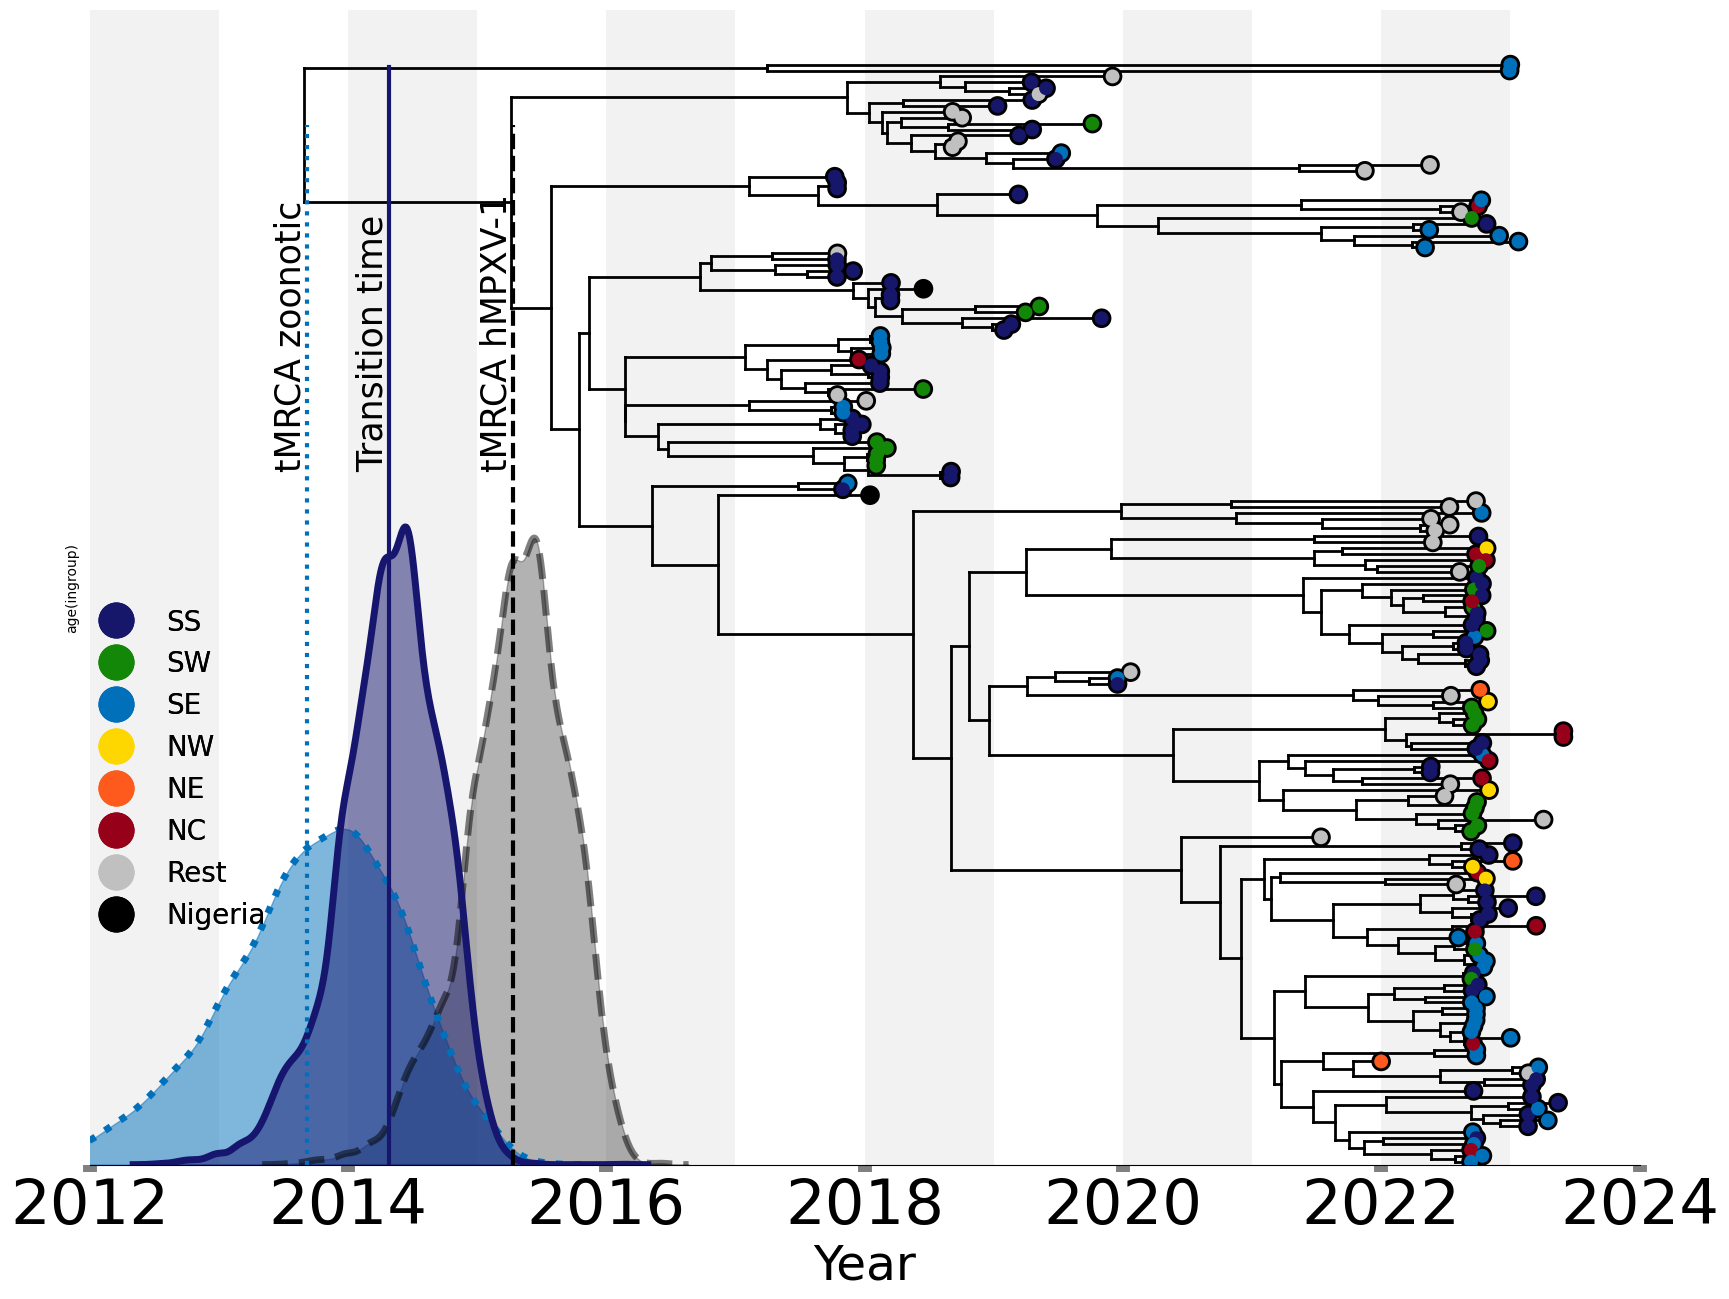

In [1]:
my_tree = bt.loadNexus("../tmrca_EPOCH_DEC_MPOX/2pruned_tmrca_APOBEC3.mcc.tree", tip_regex="[A-Za-z\|\|0-9?]+\|([0-9\-]+)", absoluteTime=True)
my_tree.treeStats() 
outfile = "epoch.pruned.mcc.tree"
fig, ax = plt.subplots(figsize=(20,15), facecolor='w')

dd = {'SS': "#16166B",
    'SW': "#138808",
    'SE': "#0070BB",
    'NW': "#FFD700",
    'NE': "#FE5A1D",
    'NC': "#960018",
    'Rest': "#C0C0C0",
      'Nigeria':'black'
    
}



# Drawing transparent interval lines every 5 years on the X-axis
min_year = 1880
max_year = 2025

year_ticks=[]
for i,year in enumerate(range(min_year, max_year + 1, 1)):  # Adjusted here for a year intervalvi used one here
    # ax.axvline(year, color='k', alpha=0.05, linewidth=50)
    if i%2==0: # checks if index is even (remainder after dividing by two is 0)
        ax.axvspan(year,year+1,fc='k',ec='none',alpha=0.05)
    year_ticks.append(year)

s_func = lambda k: 100  # size of tips doubled
x_attr = lambda k: k.absoluteTime
c_func = lambda k: col_dict.get(k.name.split('|')[-2], '#C0C0C0')
col_dict = {
    "Abia": "#0070BB",
    "Benue": "#960018",
    "Bayelsa": "#16166B",
    "Anambra": "#0070BB",
    "Rivers": "#16166B",
    "Nasarawa": "#960018",
    "Kwara": "#960018",
    "FCT": "#960018",
    "Imo": "#0070BB",
    "Enugu": "#0070BB",
    "Ebonyi": "#0070BB",
    "Lagos": "#138808",
    "Delta": "#16166B",
    "Edo": "#16166B",
    "Ondo": "#138808",
    "Rivers": "#16166B",
    "Kano": "#FFD700",
    "Plateau": "#960018",
    "AkwaIbom": "#16166B",
    "Nasarawa": "#960018",
    "Kaduna": "#FFD700",
    "Borno": "#FE5A1D",
    "CrossRiver": "#16166B",
    "Niger": "#960018",
    "Oyo": "#138808",
    "Gombe": "#FE5A1D",
    "Kogi": "#960018",
    "Ogun": "#138808",
    "Unknown": "black"
    
}
my_tree.plotTree(ax, x_attr=x_attr)
my_tree.plotPoints(ax, size=s_func, colour=c_func, x_attr=x_attr)
mpl.rcParams['font.family'] = 'sans-serif'

#[ax.spines[loc].set_visible(False) for loc in ['top','right']]
#ax.set_ylim(-2, my_tree.ySpan + 2)

df2 = pd.read_csv("../tmrca_EPOCH_DEC_MPOX/Ingroup_age.txt",sep="\t")
sns.lineplot(data=df2,y=df2["age(ingroup)"]*100,x=df2["DEC_2poch_APOBEC3.transition.local.log"],alpha=0.5,color="black",linestyle="--",label="MRCA", linewidth=5)
plt.fill_between(df2["DEC_2poch_APOBEC3.transition.local.log"],df2["age(ingroup)"]*100,alpha=0.3,color="black")


df1 = pd.read_csv("../tmrca_EPOCH_DEC_MPOX/Abia_human_age.txt",sep="\t")
sns.lineplot(data=df1,y=df1["age(Abia_human)"]*100,x=df1["DEC_2poch_APOBEC3.transition.local.log"],color="#0070BB", linestyle=":",label="2022 Spillover", linewidth=5)
plt.fill_between(df1["DEC_2poch_APOBEC3.transition.local.log"],df1["age(Abia_human)"]*100,alpha=0.5,color="#0070BB")

# Your existing code for reading data and creating the plot
df = pd.read_csv("../tmrca_EPOCH_DEC_MPOX/Apobec3_transition_age.txt",sep="\t")
sns.lineplot(data=df, y=df["age(apobec3.transition)"]*100, x=df["DEC_2poch_APOBEC3.transition.local.log"], color="#16166F", label="Transition time", linewidth=5)
plt.fill_between(df["DEC_2poch_APOBEC3.transition.local.log"], df["age(apobec3.transition)"]*100, alpha=0.5, color="#16166F")

tn, tx = 2012, 2024
plt.xlim(tn, tx)

# Your axvline code
plt.axvline(2014.318, 0, 0.95, linewidth=3, color="#16166F")
plt.axvline(2015.282, 0, 0.9, linewidth=3, linestyle="--", color="black")
plt.axvline(2013.684, 0, 0.9, linewidth=3, linestyle=":", color="#0070BB")

# Adding text annotations
padding = 0.26  # Adjust for padding from the line
y_pos = 0.60  # Adjust as necessary for the position of your label
plt.text(2014.318- padding, y_pos * plt.ylim()[1], 'Transition time', fontsize=25, rotation=90, verticalalignment='bottom', color='black')
plt.text(2015.282- padding, y_pos * plt.ylim()[1], 'tMRCA hMPXV-1', fontsize=25,rotation=90, verticalalignment='bottom', color='black')
plt.text(2013.684- padding, y_pos * plt.ylim()[1], 'tMRCA zoonotic', fontsize=25, rotation=90, verticalalignment='bottom', color='black')



legend_lines = [mlines.Line2D([], [], color=color, marker='o', markersize=25, linestyle='None', label=label) for label, color in dd.items()]

# Create a list of patches to add to the legend
#legend_lines = [mpatches.Patch(color=color, label=label), marker='o', markersize=32, for label, color in dd.items()]
#legend_patches = [mpatches.Patch(color=color, label=label) for label, color in dd.items()]
legend1 = ax.legend(handles=legend_lines, markerfirst=True, frameon=False, bbox_to_anchor=[.130, 0.182], prop={'size': 20}, facecolor='w')

# Add the first legend to the plot
ax.add_artist(legend1)

#plt.legend(frameon=False, bbox_to_anchor=[.2, 0.490], fontsize=20)

# plt.xlim(0,0.0004)
plt.ylim(0)
#plt.ylabel("Density", fontsize=35)
plt.xlabel("Year", fontsize=35)
plt.xticks(fontsize=45)
ax.set_yticks([])
ax.tick_params(axis='x', size=5, width=10, color='grey')
[ax.spines[loc].set_visible(False) for loc in ['left','top','right']]

plt.savefig("../tmrca_EPOCH_DEC_MPOX/2new_mpox_tmrca.pdf", bbox_inches='tight')
plt.savefig("../tmrca_EPOCH_DEC_MPOX/2new_mpox_tmrca.svg", bbox_inches='tight')
plt.savefig("../tmrca_EPOCH_DEC_MPOX/2new_mpox_tmrca.png", bbox_inches='tight')


Tree height: 54.909626
Tree length: 215.584259
strictly bifurcating tree
annotations present

Numbers of objects in tree: 365 (182 nodes and 183 leaves)



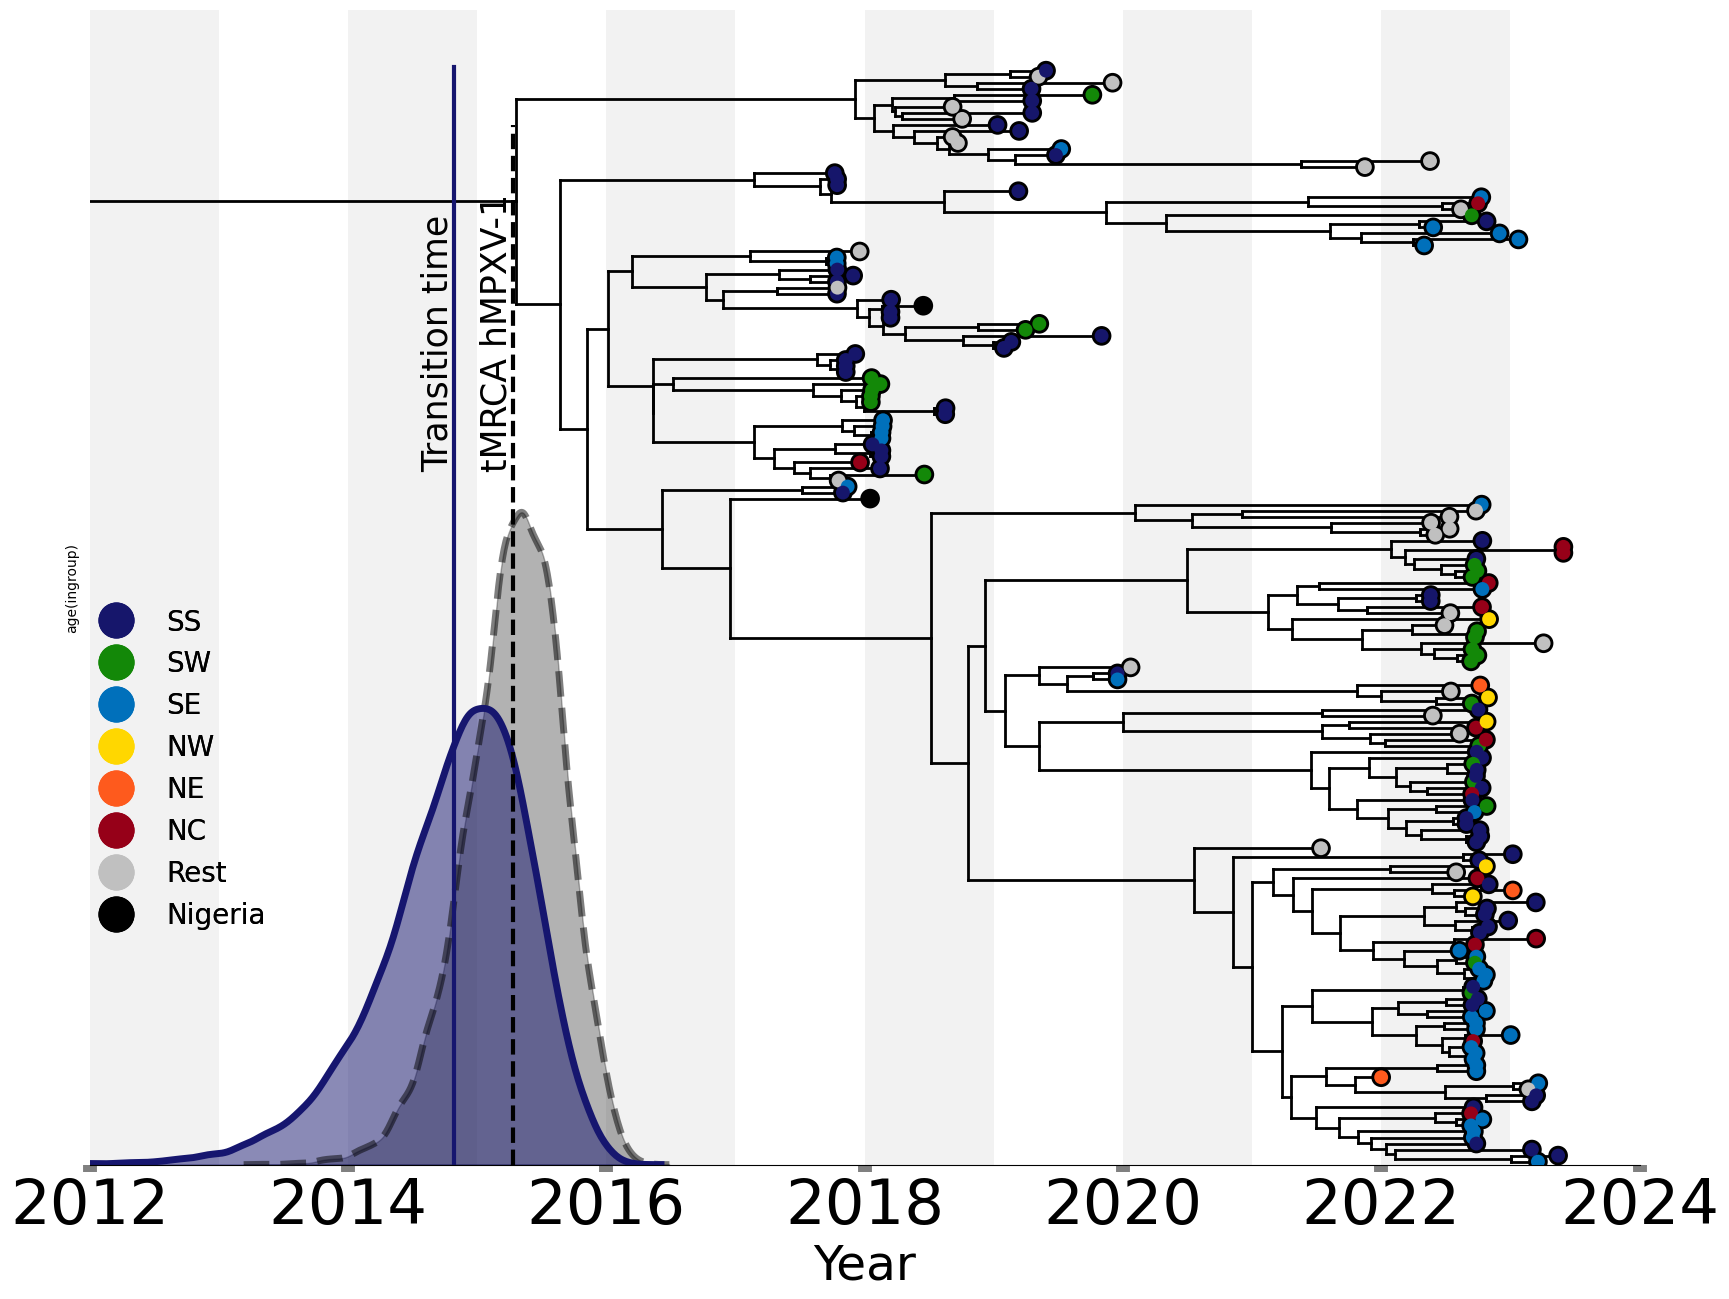

In [9]:
my_tree = bt.loadNexus("../../../../Downloads/Complete_mpox_dataset_2024/1RM_ABIA/APOBEC_MPOX_RM.MCC.tree", tip_regex="[A-Za-z\|\|0-9?]+\|([0-9\-]+)", absoluteTime=True)
my_tree.treeStats() 
outfile = "epoch.pruned.mcc.tree"
fig, ax = plt.subplots(figsize=(20,15), facecolor='w')



# Drawing transparent interval lines every 1 years on the X-axis
min_year = 1880
max_year = 2025
  
    
    #or you can use this instead of hard coding 
    
    # Drawing transparent interval lines every 5 years on the X-axis
#min_year = int(my_tree.root.absoluteTime)
#max_year = int(my_tree.mostRecent)

year_ticks=[]
for i,year in enumerate(range(min_year, max_year + 1, 1)):  # Adjusted here for a year intervalvi used one here
    # ax.axvline(year, color='k', alpha=0.05, linewidth=50)
    if i%2==0: # checks if index is even (remainder after dividing by two is 0)
        ax.axvspan(year,year+1,fc='k',ec='none',alpha=0.05)
    year_ticks.append(year)

s_func = lambda k: 100  # size of tips doubled
x_attr = lambda k: k.absoluteTime
c_func = lambda k: col_dict.get(k.name.split('|')[-2], '#C0C0C0')

my_tree.plotTree(ax, x_attr=x_attr)
my_tree.plotPoints(ax, size=s_func, colour=c_func, x_attr=x_attr)
mpl.rcParams['font.family'] = 'sans-serif'

#[ax.spines[loc].set_visible(False) for loc in ['top','right']]
#ax.set_ylim(-2, my_tree.ySpan + 2)

df2 = pd.read_csv("../../../../Downloads/Complete_mpox_dataset_2024/1RM_ABIA/ingroup_age_time.txt",sep="\t")
sns.lineplot(data=df2,y=df2["age(ingroup)"]*100,x=df2["DEC_2poch_APOBEC3.transition.local.log"],alpha=0.5,color="black",linestyle="--",label="MRCA", linewidth=5)
plt.fill_between(df2["DEC_2poch_APOBEC3.transition.local.log"],df2["age(ingroup)"]*100,alpha=0.3,color="black")



# Your existing code for reading data and creating the plot
df1 = pd.read_csv("../../../../Downloads/Complete_mpox_dataset_2024/1RM_ABIA/age_transition_tiem.txt",sep="\t")
sns.lineplot(data=df1, y=df1["age(apobec3.transition)"]*100, x=df1["DEC_2poch_APOBEC3.transition.local.log"], color="#16166F", label="Transition time", linewidth=5)
plt.fill_between(df1["DEC_2poch_APOBEC3.transition.local.log"], df1["age(apobec3.transition)"]*100, alpha=0.5, color="#16166F")

tn, tx = 2012, 2024
plt.xlim(tn, tx)

# Your axvline code
plt.axvline(2014.825, 0, 0.95, linewidth=3, color="#16166F")
plt.axvline(2015.281, 0, 0.9, linewidth=3, linestyle="--", color="black")

# Adding text annotations
padding = 0.26  # Adjust for padding from the line
y_pos = 0.60  # Adjust as necessary for the position of your label
plt.text(2014.825- padding, y_pos * plt.ylim()[1], 'Transition time', fontsize=25, rotation=90, verticalalignment='bottom', color='black')
plt.text(2015.281- padding, y_pos * plt.ylim()[1], 'tMRCA hMPXV-1', fontsize=25,rotation=90, verticalalignment='bottom', color='black')



legend_lines = [mlines.Line2D([], [], color=color, marker='o', markersize=25, linestyle='None', label=label) for label, color in dd.items()]

# Create a list of patches to add to the legend
#legend_lines = [mpatches.Patch(color=color, label=label), marker='o', markersize=32, for label, color in dd.items()]
#legend_patches = [mpatches.Patch(color=color, label=label) for label, color in dd.items()]
legend1 = ax.legend(handles=legend_lines, markerfirst=True, frameon=False, bbox_to_anchor=[.130, 0.182], prop={'size': 20}, facecolor='w')

# Add the first legend to the plot
ax.add_artist(legend1)

#plt.legend(frameon=False, bbox_to_anchor=[.2, 0.490], fontsize=20)

# plt.xlim(0,0.0004)
plt.ylim(0)
#plt.ylabel("Density", fontsize=35)
plt.xlabel("Year", fontsize=35)
plt.xticks(fontsize=45)
ax.set_yticks([])  # This removes the y-axis ticks, effectively removing the scale
ax.tick_params(axis='x', size=5, width=10, color='grey')
[ax.spines[loc].set_visible(False) for loc in ['left','top','right']]

plt.savefig("../../../../Downloads/Complete_mpox_dataset_2024/1RM_ABIA/RM2new_mpox_tmrca.pdf", bbox_inches='tight')
plt.savefig("../../../../Downloads/Complete_mpox_dataset_2024/1RM_ABIA/RM2new_mpox_tmrca.svg", bbox_inches='tight')
plt.savefig("../../../../Downloads/Complete_mpox_dataset_2024/1RM_ABIA/RM2new_mpox_tmrca.png", bbox_inches='tight')
plt.show()

52.63414530238023 0.0137302257565494
2014.9791666666608 2024.0


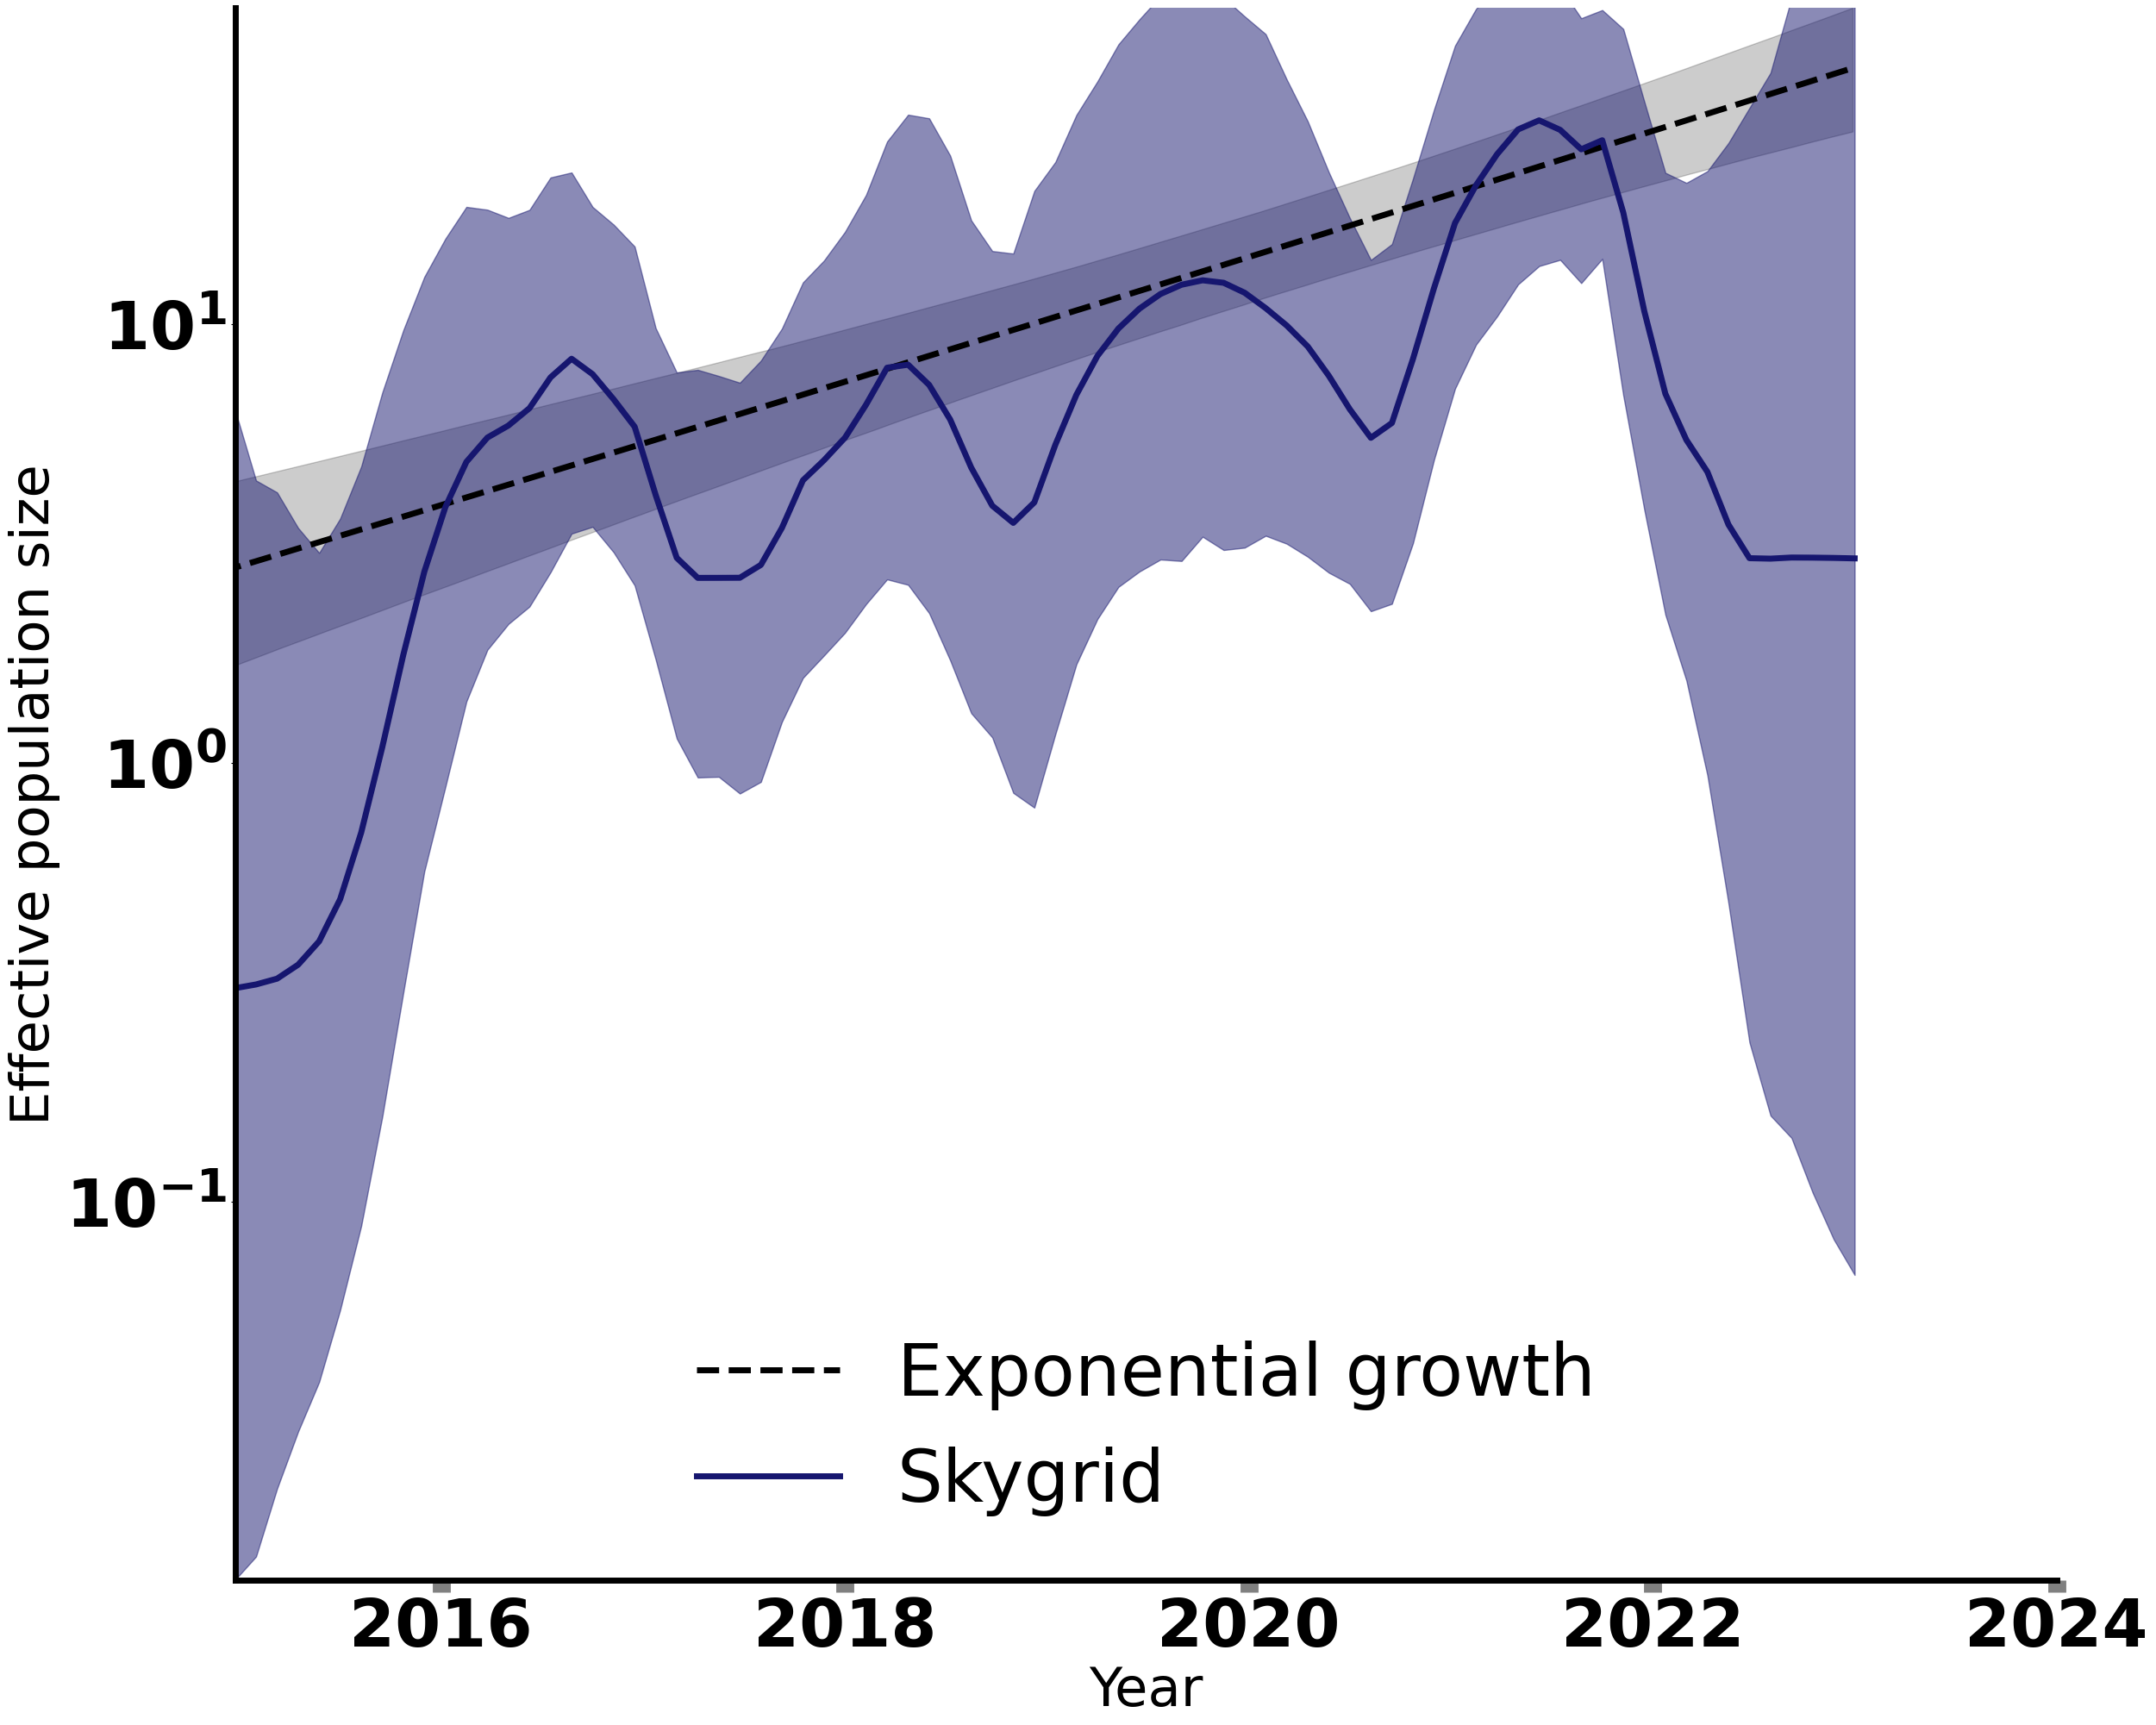

In [10]:
df = pd.read_csv("../tmrca_EPOCH_DEC_MPOX/New_skygrid_MPOX_FEB.txt",sep="\t",skiprows=[0])
df["time"] = pd.to_numeric(df["time"])

df2 = pd.read_csv("../tmrca_EPOCH_DEC_MPOX/new_data_exponential_growth.txt",sep="\t",skiprows=[0])
df2["time"] = pd.to_numeric(df2["time"])


fig,ax= plt.subplots(figsize=(25,20),facecolor='w',frameon=False)

sns.lineplot(data=df2, x=df2["time"],y=df2["mean"],linewidth=5,color="black",linestyle="--",  label="Exponential growth")
plt.fill_between(df2["time"],df2["upper"],df2["lower"],alpha=0.2,color="black")

sns.lineplot(data=df, x=df["time"],y=df["mean"],linewidth=5,color="#16166F",label="Skygrid")
plt.fill_between(df["time"],df["upper"],df["lower"],alpha=0.5,color="#16166F")

plt.ylim(0)


plt.yscale("log")
plt.ylabel("Effective population size", fontsize=45)
plt.xlabel("Year", fontsize=45)

ax.tick_params(axis='x', size=10, width=15, color='grey')

x = df2['upper'].max()
n = df['lower'].min()
plt.ylim(n,x)
tx = df2['time'].max()
tn = df['time'].min()
plt.xlim(tn,tx)


print(x, n)
print(tn,tx)
plt.legend(frameon=False,loc="lower center", fontsize=55,  prop={'size': 60})

#[ax.spines[loc].set_visible(False) for loc in ['top','right']].set_linewidth(15)

# Assuming 'ax' is your Axes object
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the linewidth of the bottom and left spines
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(5)
plt.yticks(fontsize=55, fontweight='bold')
plt.xticks(fontsize=55, fontweight='bold')
fig.tight_layout(pad=0.65)    
plt.savefig("../tmrca_EPOCH_DEC_MPOX/corrected_skygrid_vs_epoch_exponential.svg");
plt.savefig("../tmrca_EPOCH_DEC_MPOX/corrected_skygrid_vs_epoch_exponential.png");
plt.savefig("../tmrca_EPOCH_DEC_MPOX/corrected_skygrid_vs_epoch_exponential.pdf");
plt.show();

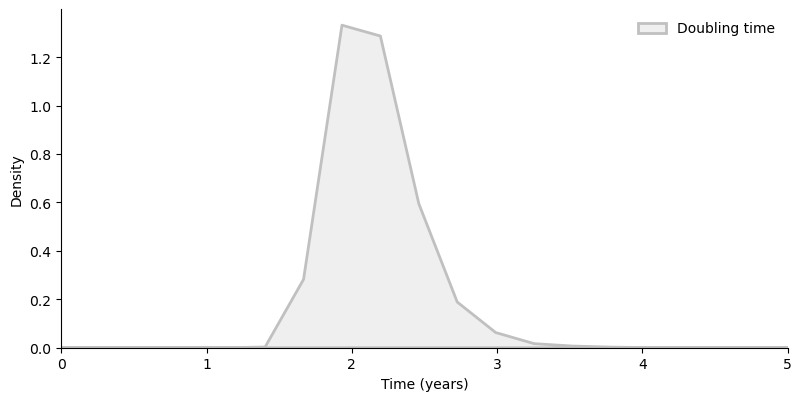

In [13]:
fig,ax= plt.subplots(figsize=(8,4),facecolor='w',frameon=False)

def return_doubling_time(rate):
    dt = (math.log(2))/rate
    return dt

df2 = pd.read_csv("../tmrca_EPOCH_DEC_MPOX/2-EPOCH_Model-transition-local.log",sep="\t")
df2["doubling_time"] = return_doubling_time(df2["exponential.growthRate"])


#sns.kdeplot(transition_wrt_mrca,cut=0,fill="#50727F",color="#50727F",linewidth=2,label="Transition time")
#plt.fill_between(df["apobec3_2partition.epoch.combined.log"],df["age(apobec3.transition)"],alpha=0.5,color="#50727F")

#also plot the growth rates

sns.kdeplot(df2["doubling_time"],cut=0,fill="black",color="#C0C0C0",linewidth=2,label="Doubling time")
plt.legend(frameon=False)

plt.xlim(0,5)
plt.ylim(0)
plt.ylabel("Density")
plt.xlabel("Time (years)")

[ax.spines[loc].set_visible(False) for loc in ['top','right']]

fig.tight_layout(pad=0.65)    
plt.savefig("../tmrca_EPOCH_DEC_MPOX/transition_wrt_mrca.svg");
plt.savefig("../tmrca_EPOCH_DEC_MPOX/transition_wrt_mrca.png");